Скачайте двнные классификации листьев растений по ссылке.
https://archive.ics.uci.edu/ml/machine-learning-databases/00241/

Загрузим файл `data_Mar_64.txt`.

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploder = files.upload()

Saving data_Mar_64.txt to data_Mar_64.txt


In [3]:
data = pd.read_csv('data_Mar_64.txt', header=None)


Первый столбец - ответ, положим его в отдельную переменную.

In [4]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]
X

array([[0.003906, 0.003906, 0.027344, ..., 0.      , 0.017578, 0.      ],
       [0.005859, 0.013672, 0.027344, ..., 0.003906, 0.046875, 0.      ],
       [0.011719, 0.001953, 0.027344, ..., 0.      , 0.015625, 0.      ],
       ...,
       [0.013672, 0.005859, 0.007812, ..., 0.037109, 0.009766, 0.009766],
       [0.015625, 0.015625, 0.011719, ..., 0.011719, 0.003906, 0.009766],
       [0.019531, 0.013672, 0.007812, ..., 0.029297, 0.005859, 0.03125 ]])

Целевая переменная принимает текстовое значение. С помощью `LabelEncoder` из `sklearn` закодируй тектовую переменную `y_name` и сохраните полученные значения в переменную `y`.

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_name)
y

array([ 0,  0,  0, ..., 99, 99, 99])

С помощью метода главных компонент снизьте размерность признакового пространства до двух. Зафиксируйте `random_state=0`

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_2d = pca.fit_transform(X)
X_new = pca_2d[y<15]
pca_2d

array([[-0.03307489,  0.02892331],
       [-0.02422727,  0.01839179],
       [-0.02629431,  0.03441262],
       ...,
       [-0.06300588, -0.05859334],
       [-0.03770296, -0.05299064],
       [-0.03348526, -0.03997298]])

Выберите объекты, которые соответствуют значениям от 0 до 14 целевой переменной `y`. Изобразите выбранные объекты в двумерном пространстве признаков с помощью метода `scatter` из `matplotlib.pyplot`. Чтобы разным цветом отобразить объекты разных классов, в метод `scatter` передайте `c = y[y<15]`.

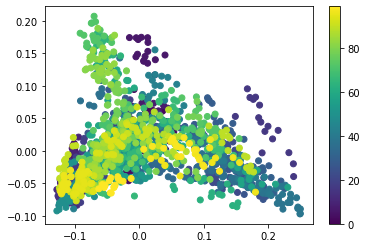

In [7]:
import matplotlib.pyplot as plt

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c = y)
plt.colorbar()
plt.show()

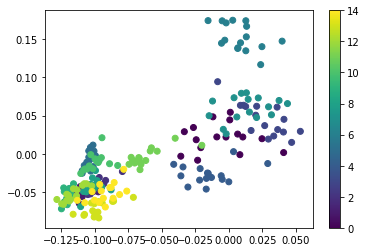

In [8]:
plt.scatter(X_new[:, 0], X_new[:, 1], c = y[y<15])
plt.colorbar()
plt.show()

Проделайте тоже самое для метода TSNE.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


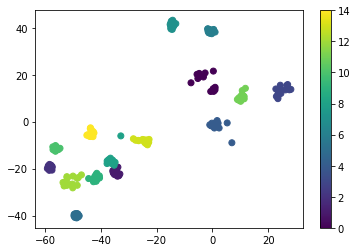

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_2d = tsne.fit_transform(X)
X_new_1 = tsne_2d[y<15]
plt.scatter(X_new_1[:, 0], X_new_1[:, 1], c = y[y<15])
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


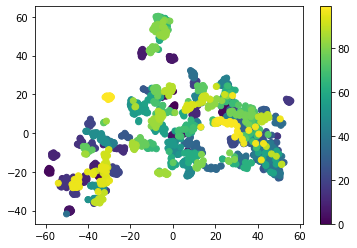

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_2d = tsne.fit_transform(X)
X_new_1 = tsne_2d[y<15]
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], c = y)
plt.colorbar()
plt.show()

1. Укажите координаты объекта с индексом 0 (`X[0]`) после применения метода TSNE. Округлите числа до сотых.

In [11]:
X_new_1[0]

array([-7.6796513, 16.541327 ], dtype=float32)

In [12]:
X_X_new_1 = round(X_new_1[0,0], 2)
Y_X_new_1 = round(X_new_1[0,1], 2)
print(X_X_new_1, Y_X_new_1)

-7.68 16.54


2. Укажите координаты объекта с индексом 0 (X[0]) после применения метода PCA. Округлите числа до сотых.

In [13]:
X_new[0]

array([-0.03307489,  0.02892331])

In [14]:
X_X_new = round(X_new[0,0], 2)
Y_X_new = round(X_new[0,1], 2)
print(X_X_new, Y_X_new)

-0.03 0.03


3. Какие выводы можно сделать из полученных изображений?
- С мпомощью метода главных компонет удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы 

- **С мпомощью метода TSNE удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы**

- С мпомощью методов TSNE и PCA удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы

- С мпомощью методов TSNE и PCA удалось визуализировать объекты на плоскоти и объекты разных класов визуально не разделимы


## K_means

Реализуйте класс MyKMeans.

Класс должен соответствовать шаблону, который приведен ниже

В конструктор класса передаются:
- n_clusters - число кластеров, на которое будут разбиты данные

- n_iters - максимальное число итераций, может быть сделано в данном алгоритме

В методе `fit`:

- self.centers - центры кластеров, которые пересчитываются на каждой итерации. Изначально выбираются случайным образом с фиксированным seed.

далее в цикле по числу итераций вам необходимо реализовать:
-  вычисление ближайшего центра кластера для каждого объекта
- пересчет центра каждого кластера( среднее каждой из координат всех объектов, отнесенных к этому кластеру)
посчитанные новые центры кластеров положите в переменную `new_centers`

В методе `predict`:

вычисляются ближайшие центры кластеров для объектов `X`




In [15]:
from sklearn.metrics import pairwise_distances_argmin
class MyKMeans():
  def __init__(self, n_clusters=3, n_iters = 100):
    self.n_clusters = n_clusters
    self.n_iters = n_iters
    
  def fit(self, X):
    np.random.seed(0)
    self.centers = np.random.uniform(low=X.min(axis = 0),
                                high=X.max(axis = 0),
                                size=(self.n_clusters, X.shape[1]))

    for it in range(self.n_iters):
    
      ## your code here
        
      if np.all(self.centers == new_centers):
          break

      self.centers = new_centers


  def predict(self, X):
    labels = pairwise_distances_argmin(X, self.centers)
    return labels

'''И снова классы...'''

'И снова классы...'

Сгенерируем данные для кластеризации

In [16]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.0, 0.5],
                             random_state=0)

In [17]:
X, y = noisy_blobs

4. Кластеризуйте объекты noisy_blobs с помощью `MyKMeans`, используйте гиперпараметры `n_clusters=3`, `n_iters=100`. Укажите ответ для объекта с индексом 1.

In [18]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=3, max_iter = 100, random_state=0).fit(X)
kmeans1.cluster_centers_

array([[ 3.37500738, -0.54848091],
       [-1.41133114,  2.77172772],
       [ 1.29310833,  4.43351566]])

In [19]:
kmeans1.cluster_centers_[1]

array([-1.41133114,  2.77172772])

In [55]:
from sklearn.metrics import pairwise_distances_argmin
a = pairwise_distances_argmin(X, kmeans1.cluster_centers_)
print(a[1])

2


In [20]:
kmeans1.n_iter_

7

5. Кластеризуйте объекты noisy_blobs, используйте гиперпараметры n_clusters=3, n_iters = 5. Укажите ответ для объекта с индексом 1.

In [21]:
kmeans2 = KMeans(n_clusters=3, max_iter = 5, random_state=0).fit(X)
kmeans2.cluster_centers_

array([[ 3.33898167, -0.55075879],
       [-1.41471869,  2.79277328],
       [ 1.29926561,  4.43207905]])

In [22]:
kmeans2.cluster_centers_[1]

array([-1.41471869,  2.79277328])

In [57]:
a = pairwise_distances_argmin(X, kmeans2.cluster_centers_)
print(a[1])

2


In [23]:
kmeans2.n_iter_

5

6. Вычислите у какого числа объектов изменилась метка предсказываемого кластера при изменении гиперпараметра n_iters с 5 до 100

In [60]:
from sklearn.metrics import pairwise_distances_argmin

labels1 = pairwise_distances_argmin(X, kmeans1.cluster_centers_)
labels2 = pairwise_distances_argmin(X, kmeans2.cluster_centers_)

c = 0

for i in range(len(labels1)):
  if labels1[i] != labels2[i]:
    c+=1

print(c)

+
+
2


7. Определите сколько за сколько итераций сошелся алгоритм на объектах объекты noisy_blobs?

In [25]:
kmeans1.n_iter_

7

## DBSCAN

8. Кластеризуйте объекты noisy_blobs с помощью DBSCAN. Используйте реализацию DBSCAN из sklearn. Зафиксируйте гиперпараметр eps=0.5. Укажите ответ для объекта с индексом 1.

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X)
clusters[1]

0

9. Укажите полученное число кластеров?

In [27]:
len(set(dbscan.labels_))-(1 if -1 in dbscan.labels_ else 0)

11

10. Сколько объектов было отнечено к выбросам (имеют метку -1)?

In [28]:
c=0
for i in range(len(dbscan.labels_)):
  if dbscan.labels_[i] == -1:
    c+=1
c

152